In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive, files
import os


In [2]:
drive.mount('/content/drive')
dir_path = "/content/drive/MyDrive/DR/colored_images/"


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/DR/archive.zip"
extract_path = "/content/drive/MyDrive/DR/"

# Open the zip file for reading
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all files to the given directory
    zip_ref.extractall(extract_path)

In [3]:
for root, dirs, files in os.walk(dir_path):
    # Print the path of each file
    for file in files:
        print(os.path.join(root, file))

/content/drive/MyDrive/DR/colored_images/Mild/0684311afdfc.png
/content/drive/MyDrive/DR/colored_images/Mild/06b71823f9cd.png
/content/drive/MyDrive/DR/colored_images/Mild/07929d32b5b3.png
/content/drive/MyDrive/DR/colored_images/Mild/07a1c7073982.png
/content/drive/MyDrive/DR/colored_images/Mild/086d41d17da8.png
/content/drive/MyDrive/DR/colored_images/Mild/09935d72892b.png
/content/drive/MyDrive/DR/colored_images/Mild/0a3202889f4d.png
/content/drive/MyDrive/DR/colored_images/Mild/0a61bddab956.png
/content/drive/MyDrive/DR/colored_images/Mild/0ad7f631dedb.png
/content/drive/MyDrive/DR/colored_images/Mild/0d310aba6373.png
/content/drive/MyDrive/DR/colored_images/Mild/0dc031c94225.png
/content/drive/MyDrive/DR/colored_images/Mild/0dce95217626.png
/content/drive/MyDrive/DR/colored_images/Mild/0eb52045349f.png
/content/drive/MyDrive/DR/colored_images/Mild/0f495d87656a.png
/content/drive/MyDrive/DR/colored_images/Mild/0fb1053285cf.png
/content/drive/MyDrive/DR/colored_images/Mild/101b9ebfc

In [4]:
os.listdir(dir_path)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [5]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image,UnidentifiedImageError



In [6]:
def load_imgs(impath):
    imgs=[]
    label=[]
    l1=os.listdir(impath)
    for i in l1:
        l2=os.listdir(impath+'/'+i)
        for j in l2:
                try:
                  filepath=impath+i+'/'+j
                  img=Image.open(filepath)
                  imgs.append(np.array(img)) 
                  label.append(i)
                except UnidentifiedImageError as e:
                  print(f'Error reading image at file path {filepath}: {e}')
                  continue           
    return np.array(imgs),label

    
    

In [7]:
x,y=load_imgs(dir_path)
print(x.shape)
print(len(y))

Error reading image at file path /content/drive/MyDrive/DR/colored_images/Mild/05a5183c92d0.png: cannot identify image file '/content/drive/MyDrive/DR/colored_images/Mild/05a5183c92d0.png'
(3661, 224, 224, 3)
3661


In [8]:
print(y)

['Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild', 'Mild',

In [9]:
unique_categories, category_counts = np.unique(y, return_counts=True)
for i in range(len(unique_categories)):
    print(f"Category '{unique_categories[i]}' occurs {category_counts[i]} times.")


Category 'Mild' occurs 369 times.
Category 'Moderate' occurs 999 times.
Category 'No_DR' occurs 1805 times.
Category 'Proliferate_DR' occurs 295 times.
Category 'Severe' occurs 193 times.


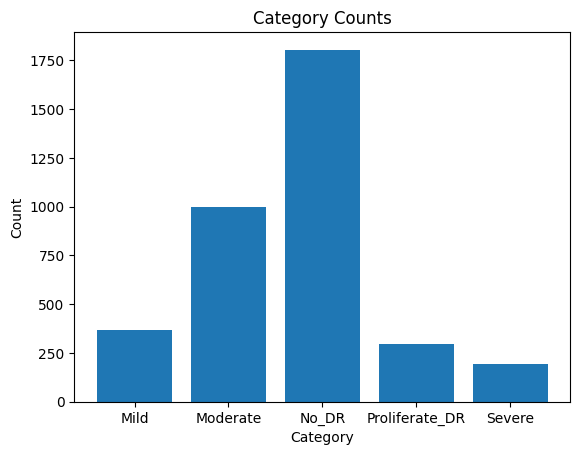

In [10]:
#Plot a bar graph
plt.bar(unique_categories, category_counts)
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [11]:
target=pd.Series(y,dtype='category')
print(target)

0         Mild
1         Mild
2         Mild
3         Mild
4         Mild
         ...  
3656    Severe
3657    Severe
3658    Severe
3659    Severe
3660    Severe
Length: 3661, dtype: category
Categories (5, object): ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [12]:
#Encoding the categories: 
t=target.cat.codes
print(t)

0       0
1       0
2       0
3       0
4       0
       ..
3656    4
3657    4
3658    4
3659    4
3660    4
Length: 3661, dtype: int8


In [13]:
# get the unique categories in the Series
unique_categories = target.unique()

# create a dictionary that maps each category to its corresponding integer code
code_map = dict(zip(unique_categories, t.unique()))

print(code_map)

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}


In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,t,test_size=0.2,shuffle=True)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2928, 224, 224, 3)
(733, 224, 224, 3)
(2928,)
(733,)


In [15]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
#from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define the augmentation transformations to apply
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow(train_x, train_y, batch_size=32)

validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
validation_gen=validation_datagen.flow(test_x,test_y,batch_size=32)



In [16]:
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [17]:
train_x=train_x/255.0
test_x=test_x/255.0

from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))



Epoch 1/10
92/92 [==============================] - 21s 89ms/step - loss: 0.9165 - accuracy: 0.6885 - val_loss: 0.8012 - val_accuracy: 0.7040
Epoch 2/10
92/92 [==============================] - 5s 58ms/step - loss: 0.7625 - accuracy: 0.7138 - val_loss: 0.8193 - val_accuracy: 0.7026
Epoch 3/10
92/92 [==============================] - 6s 61ms/step - loss: 0.7419 - accuracy: 0.7261 - val_loss: 0.7972 - val_accuracy: 0.7026
Epoch 4/10
92/92 [==============================] - 5s 58ms/step - loss: 0.7324 - accuracy: 0.7333 - val_loss: 0.8093 - val_accuracy: 0.6753
Epoch 5/10
92/92 [==============================] - 6s 61ms/step - loss: 0.7286 - accuracy: 0.7353 - val_loss: 0.7688 - val_accuracy: 0.7231
Epoch 6/10
92/92 [==============================] - 5s 57ms/step - loss: 0.7091 - accuracy: 0.7357 - val_loss: 0.7726 - val_accuracy: 0.7053
Epoch 7/10
92/92 [==============================] - 5s 58ms/step - loss: 0.6946 - accuracy: 0.7445 - val_loss: 0.7612 - val_accuracy: 0.7149
Epoch 8/10
9

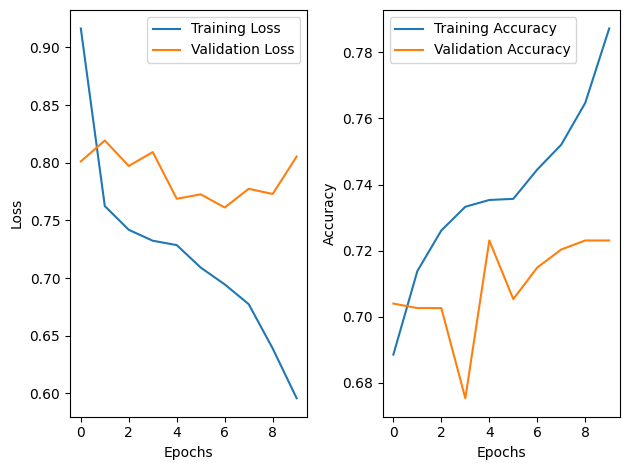

In [22]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# get the predicted class probabilities for the validation set
y_pred_prob = model.predict(test_x)

# get the predicted class for each sample in the validation set
y_pred = np.argmax(y_pred_prob, axis=1)

# get a batch of validation images and their true labels
x_val, y_val = next(validation_gen)

# select a random image from the batch
index = np.random.randint(len(x_val))

# get the predicted label for the selected image
label_pred = y_pred[18]

# get the true label for the selected image
label_true = y_val[18]

# get the image array for the selected image
img = x_val[18]

# display the image with the predicted and true labels
plt.imshow(img)
plt.title(f"Predicted label: {label_pred}, True label: {label_true}")
plt.show()

23/23 [==============================] - 1s 20ms/step


TypeError: ignored

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted class probabilities for the testing set
y_pred_prob = model.predict(test_x)

# Get the predicted class for each sample in the testing set
y_pred = np.argmax(y_pred_prob, axis=1)

# Get a batch of testing images and their true labels
x_test, y_test = test_x, test_y

# Select a random image from the batch
index = np.random.randint(len(x_test))

# Get the predicted label for the selected image
label_pred = y_pred[index]

# Get the true label for the selected image
label_true = y_test[index]

# Get the image array for the selected image
img = x_test[index]

# Display the image with the predicted and true labels
plt.imshow(img)
plt.title(f"Predicted label: {label_pred}, True label: {label_true}")
plt.show()


23/23 [==============================] - 1s 25ms/step


KeyError: ignored

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted class probabilities for the testing set
y_pred_prob = model.predict(test_x)

# Get the predicted class for each sample in the testing set
y_pred = np.argmax(y_pred_prob, axis=1)

# Get a batch of testing images and their true labels
x_test, y_test = test_x, test_y

# Select a random image from the batch
index = np.random.randint(len(x_test))

# Get the predicted label for the selected image
label_pred = y_pred[index]

# Get the true label for the selected image
label_true = y_test[index]

# Get the image array for the selected image
img = x_test[index]

# Display the image with the predicted and true labels
plt.imshow(img)
plt.title(f"Predicted label: {label_pred}, True label: {label_true}")
plt.show()


23/23 [==============================] - 1s 21ms/step


KeyError: ignored

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted class probabilities for the testing set
y_pred_prob = model.predict(test_x)

# Get the predicted class for each sample in the testing set
y_pred = np.argmax(y_pred_prob, axis=1)

# Get a batch of testing images and their true labels
x_test, y_test = test_x, test_y

# Select a random index from the available indices
index = np.random.randint(len(x_test))

# Get the predicted label for the selected image
label_pred = y_pred[index]

# Get the true label for the selected image
label_true = y_test[index]

# Get the image array for the selected image
img = x_test[index].tolist()

# Display the image with the predicted and true labels
plt.imshow(img)
plt.title(f"Predicted label: {label_pred}, True label: {label_true}")
plt.show()


NameError: ignored